In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from skimage import io, color, transform, feature
import my_measures
import os
%matplotlib inline

# Setup files & dataframes

In [3]:
#location of your cropped music score images
images ='images/'
# location of your metadata csv
metadata = 'timestamps.csv'

In [4]:
#create image filename dataset from images folder
file_list = []
for root, dirs, files in os.walk(images):
    for file in files:
        file_list.append(file)
        
print(len(file_list))
        
np.savetxt('filenames.csv', file_list, fmt="%s", delimiter = ",", header='img', comments='')

277


In [5]:
#create dataframe from filenames dataset
df = pd.read_csv('filenames.csv')
df

,img
0,176.png
1,88.png
2,162.png
3,189.png
4,77.png
5,63.png
6,228.png
7,200.png
8,214.png
9,215.png


In [7]:
#attach additional metadata to main dataframe
df2 = pd.read_csv(metadata)
df['measure']=df2['measure']
df['beat']=df2['measure']
df['timestamp']=df2['timestamp']
df.head()

,img,measure,beat,timestamp
0,176.png,1.0,1.0,1.12
1,88.png,1.0,1.0,2.28
2,162.png,1.0,1.0,3.00
3,189.png,1.0,1.0,3.78
4,77.png,2.0,2.0,4.48


# Process Image

In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import warnings
from skimage import io, color, transform, feature
from skimage.io import imread
from skimage import filters
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt


images/1.png
downscaled image shape: 
(140, 90)
image representation (first row of pixels): 
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


example of transformation: 


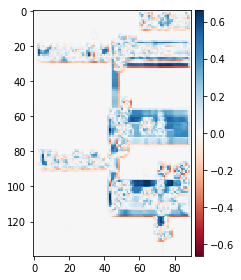

In [22]:
dims = (140, 90)
def image_manipulation(imname, imview=False):
    warnings.filterwarnings('ignore')
    imname = images + imname
    print(imname)
    img_raw = io.imread(imname)
    downscaled = transform.resize(img_raw, (dims[0], dims[1])) # downscale image
    gray = filters.sobel(color.rgb2gray(downscaled))
    edge_roberts = roberts(gray)
    edge_scharr = scharr(gray)
    edge_prewitt = prewitt(gray)
    edge_sobel = sobel(gray)
    diff_scharr_sobel = edge_roberts - edge_sobel

    if imview==True:
        io.imshow(diff_scharr_sobel)
    warnings.filterwarnings('always')
    return diff_scharr_sobel

# test the function, look at input/output
test_image = image_manipulation('1.png', True)
print('downscaled image shape: ')
print(test_image.shape)
print('image representation (first row of pixels): ')
print(test_image[0])
print('\n')
print('example of transformation: ')
original_test = io.imread(images+"/1.png")


## b. Refine until transformed version of originals are satisfactory

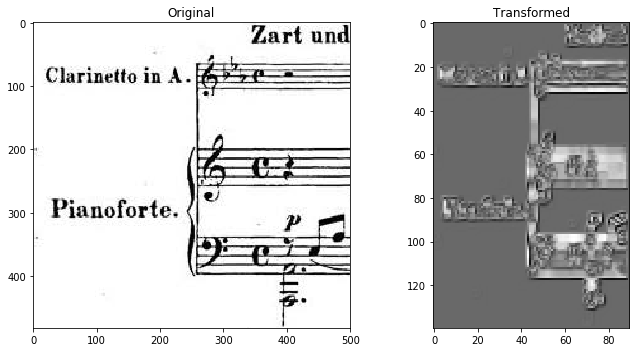

In [23]:
# Show original next to transformed
fig, ax = plt.subplots(ncols=2, sharex=False, sharey=False,
                       figsize=(10, 5))

ax[0].imshow(original_test, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(test_image, cmap=plt.cm.gray)
ax[1].set_title('Transformed')

plt.tight_layout()
plt.show()

## c. Save the image representations 

In [39]:
# construct lists for features, labels, and a crosswalk reference to image names

notation = []
timing = []
img = []

for index, row in df.iterrows():
    try:
        notation.append(image_manipulation(row['img']))
        timing.append(row['timestamp'])
        img.append(row['img'])
    except OSError:
       continue
    

images/176.png
images/88.png
images/162.png
images/189.png
images/77.png
images/63.png
images/228.png
images/200.png
images/214.png
images/215.png
images/201.png
images/229.png
images/62.png
images/188.png
images/76.png
images/163.png
images/177.png
images/89.png
images/149.png
images/161.png
images/175.png
images/60.png
images/74.png
images/48.png
images/217.png
images/203.png
images/202.png
images/216.png
images/49.png
images/75.png
images/61.png
images/174.png
images/160.png
images/148.png
images/164.png
images/170.png
images/158.png
images/59.png
images/65.png
images/71.png
images/212.png
images/.DS_Store
images/206.png
images/207.png
images/213.png
images/70.png
images/64.png
images/58.png
images/159.png
images/171.png
images/165.png
images/173.png
images/167.png
images/99.png
images/8.png
images/72.png
images/198.png
images/66.png
images/205.png
images/211.png
images/239.png
images/238.png
images/210.png
images/204.png
images/199.png
images/67.png
images/73.png
images/9.png
image

In [40]:
notations

array([], dtype=float64)

In [44]:
# convert the lists to ndarrays
notations = np.asarray(notation)
timings = np.asarray(timing)
imgs = np.asarray(img)

# flatten the images ndarray to one row per image
features_flat = notations.reshape((notations.shape[0], -1))

#take a look at your numerical representation of notations
notations

array([[[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          -3.87062188e-04,   9.88742816e-04,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          -7.29598752e-04,   1.32788501e-03,   0.00000000e+00],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           7.99713937e-02,   8.52254377e-02,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           6.62925287e-02,   1.09255164e-01,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00]],

       [[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   2.76906292e-03,   5.29132927e-0

In [79]:
# write feature representations to a csv
import csv
rows = zip(imgs, notations)
with open("features.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(['img','feature'])
    for row in rows:
        writer.writerow(row)

In [80]:
reference = pd.read_csv('features.csv')
print(reference.head())

       img                                            feature
0  176.png  [[ 0.          0.          0.         ...,  0....
1   88.png  [[ 0.          0.          0.         ...,  0....
2  162.png  [[ 0.          0.          0.         ...,  0....
3  189.png  [[ 0.          0.          0.         ...,  0....
4   77.png  [[ 0.  0.  0. ...,  0.  0.  0.]\n [ 0.  0.  0....


# fit data to kmeans (clustering) ml model

In [96]:
# select number of clusters
num_clusters = 5

In [97]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=num_clusters, n_jobs=-1)
k_means.fit(features_flat)
y_kmeans = k_means.predict(features_flat)

In [98]:
labels = k_means.labels_
centroids = k_means.cluster_centers_

In [99]:
import csv
rows = zip(centroids)
with open("centroids.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(['centroids'])
    for row in rows:
        writer.writerow(row)

In [100]:
centroids_csv = pd.read_csv('centroids.csv')
print(centroids_csv.head())

                        centroids
0  [ 0.  0.  0. ...,  0.  0.  0.]
1  [ 0.  0.  0. ...,  0.  0.  0.]
2  [ 0.  0.  0. ...,  0.  0.  0.]
3  [ 0.  0.  0. ...,  0.  0.  0.]
4  [ 0.  0.  0. ...,  0.  0.  0.]


In [101]:
def group(l, size):
...     return [l[i:i+size] for i in range(0, len(l), size)]

from scipy.misc import imshow
import numpy
import PIL

for i in notations[0]:
    print (i)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.23247020e-04   1.22530935e-03
   3.99295461e-03  -4.73139738e-03   6.43663176e-04  -3.40692057e-03
  -8.32152116e-03  -2.21553732e-03   1.38388780e-03  -3.86273479e-04
   6.22168770e-04  -3.46382225e-03  -6.10669631e-03   2.22846086e-04
   1.09978259e-03  -7.65868295e-04  -1.11788918e-03  -2.09688357e-03
   6.90461150e-04   1.81399633e-03   3.47077852e-03   9.68501133e-03
  -6.41296417e-03  -1.43159722e-02  -3.08271753e-03  -5.01837675e-03
   3.56129329

[  0.00000000e+00   5.90354826e-04  -7.95731130e-04   5.67370933e-05
  -4.31026403e-04   1.07642031e-03   9.51290169e-02  -1.65566356e-01
   2.04035710e-01   2.20606439e-01   3.25037847e-01  -3.54060511e-01
  -2.14792884e-02  -3.46346829e-04  -1.74865973e-04   0.00000000e+00
   0.00000000e+00   4.48143903e-04   8.67928691e-04   1.02645677e-03
   9.12011607e-04   8.12183456e-04   8.12183456e-04   8.12183456e-04
   8.12183456e-04   8.12183456e-04   8.12183456e-04   8.12183456e-04
   8.12183456e-04   8.12183456e-04   6.38563207e-04   2.25026431e-04
  -1.36918394e-04  -2.45098039e-04   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00

   4.37877028e-02   0.00000000e+00]
[ 0.         -0.01561326 -0.07627728  0.0114573  -0.12852425  0.10649239
  0.04633364 -0.08881617  0.04851521  0.20987008 -0.03834953  0.01286528
  0.22313264  0.48680137  0.54812435  0.38450201  0.03963734 -0.20778992
 -0.1376705   0.10133063  0.29321264  0.38768219  0.4195487   0.41356525
  0.40693696  0.37757592  0.27229516  0.15081052  0.13623743  0.18261643
  0.20113357  0.23483622  0.26418971  0.25589011  0.24219584  0.23785845
  0.2275734   0.21727322  0.21923867  0.22801482  0.23350567  0.23365345
  0.23341978  0.23351618  0.22528751  0.19593316  0.12610697  0.01989431
  0.19091589  0.00725073  0.01865516  0.11234186 -0.38086227 -0.45263012
 -0.14399647  0.03771889  0.22407072 -0.06615321 -0.08385119  0.11766368
  0.09312544  0.08617266  0.07924886  0.05774576  0.06090385  0.0519022
  0.01227664 -0.01199434 -0.02746754 -0.05257174 -0.0883485  -0.05223338
  0.06825871  0.20973653  0.24128182  0.05218367 -0.27034383 -0.37689237
 -0.20921543  0.

In [102]:
# write to a csv
import csv
rows = zip(imgs, labels)
with open("labeled_clusters.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerow(['img', 'labels'])
    for row in rows:
        writer.writerow(row)
        

In [103]:
reference = pd.read_csv('labeled_clusters.csv')
print(reference.head())
print(df.head())

       img  labels
0  176.png       2
1   88.png       1
2  162.png       0
3  189.png       1
4   77.png       4
       img  measure  beat  timestamp
0  176.png      1.0   1.0       1.12
1   88.png      1.0   1.0       2.28
2  162.png      1.0   1.0       3.00
3  189.png      1.0   1.0       3.78
4   77.png      2.0   2.0       4.48


In [104]:
# Join to original dataset
reference['labels'] = reference['labels'].astype(int)
reference['img'] = reference['img']
df['img'] = df['img']
df3 = df.merge(reference, on='img')
print(df3.head())

       img  measure  beat  timestamp  labels
0  176.png      1.0   1.0       1.12       2
1   88.png      1.0   1.0       2.28       1
2  162.png      1.0   1.0       3.00       0
3  189.png      1.0   1.0       3.78       1
4   77.png      2.0   2.0       4.48       4


In [105]:
# write new df as csv
df3.to_csv("cluster_results.csv",index=True)

In [106]:
list(df3)

['img', 'measure', 'beat', 'timestamp', 'labels']

# Create JSON

In [107]:
import csv
import json

# Master Json
csvfile = open("cluster_results.csv", 'r')
jsonfile = open('cluster_results.json', 'w')

fieldnames = ('measure', 'beat', 'timestamp', 'img', 'labels')
reader = csv.DictReader( csvfile, fieldnames)
out = json.dumps( [ row for row in reader ] )
jsonfile.write(out)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.TextIOWrapper name='cluster_results.json' mode='w' encoding='UTF-8'>
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='cluster_results.csv' mode='r' encoding='UTF-8'>
  if __name__ == '__main__':


29962

# Graph Kmeans results

In [108]:
# Average within-cluster sum-of-squares
inertia = k_means.inertia_
print(inertia)

121371.727042


In [109]:
# Dictionary of clusters and number of items classified in those clusters
dic = dict(map(lambda x  : (x , list(labels).count(x)) , labels))

# Sum number of images successfully processed
print('Images Processed: ')
print(sum(dic.values()))

Images Processed: 
276


In [110]:
# Sort results 
results = pd.DataFrame(list(dic.items()), columns=['Label', 'Number'])
results.sort_values(by=['Label'])

,Label,Number
2,0,33
1,1,26
0,2,91
4,3,62
3,4,64
